In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

result_file0 = './result_1d_0.csv' 
df = pd.read_csv(result_file0, index_col = 'datetime')

# result_file = './result.csv'
# df = df.append(pd.read_csv(result_file, index_col = 'datetime'))
# df = df.append(result)

set(df['system_name'])

{'chua1d', 'lorentz1d', 'rabinovich_fabrikant1d', 'rossler1d'}

In [2]:
system_name = 'chua'
result = df[df['system_name'].isin([system_name]) & df['horizon'].isin([1])]

temp = result.loc[result['model_name'] == 'RBFLN RE']
pt = pd.pivot_table(temp,index=['n_history'],columns=['nz','connectivity'],values=['mse'],aggfunc=[np.min])
print(pt)

pt.columns

Empty DataFrame
Columns: []
Index: []


MultiIndex([], names=[None, None, 'nz', 'connectivity'])

In [3]:

final = None
for w in set(result['n_history']):
#     fig, ax = plt.subplots()

    temp = result.loc[result['n_history'] == w, ['model_name', 'mse', 'n_history']].groupby('model_name').min().reset_index()

#     plt.bar(temp.index, temp.mse)
#     ax.set_yscale("log")
#     plt.title(w)

    final = temp if final is None else final.append(temp, ignore_index=True)

final

,model_name,mse,n_history
0,ESN,0.000003,1
1,RBFLN,0.000002,1
2,RBFLN RE 1,0.000002,1
3,RBFN,0.000002,1
4,VAR,0.000016,1
...,...,...,...
95,ESN,0.000004,30
96,RBFLN,0.000003,30
97,RBFLN RE 1,0.000001,30
98,RBFN,0.000026,30


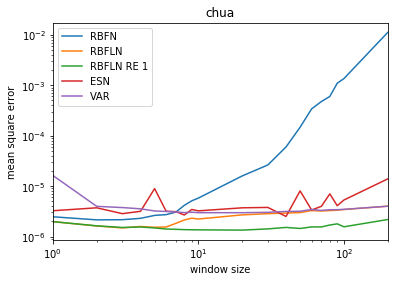

In [5]:
fig, ax = plt.subplots()
model_names = ['RBFN', 'RBFLN', 'RBFLN RE 1', 'ESN', 'VAR', ]
# model_names = [ 'RBFLN rc', 'RBFLN ESN']
for name in model_names:

    final.loc[final['model_name'] == name].set_index('n_history').sort_values(by='n_history').plot(ax = ax)

# pt[('amin', 'mse', 100, 1.0)].plot(ax=ax)
plt.legend(labels= model_names)

ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel('window size')
plt.ylabel('mean square error')
plt.title(system_name)
plt.savefig('../'+system_name+'_mse_window.pdf')
plt.show()

In [107]:
average

""


In [121]:
system_name = 'rabinovich_fabrikant1d'

In [124]:
average = pd.DataFrame()
for i in range(10):
    result_file0 = './result_1d_rabinovich_fabrikant' +str(i) + '.csv' 
    df = pd.read_csv(result_file0, index_col = 'datetime')

    result = df[df['system_name'].isin([system_name]) & df['horizon'].isin([1])]

    final = None
    for w in set(result['n_history']):

        temp = result.loc[result['n_history'] == w, ['model_name', 'mse', 'n_history']].groupby('model_name').min().reset_index()

        final = temp if final is None else final.append(temp, ignore_index=True)
        
    average = average.append(final)


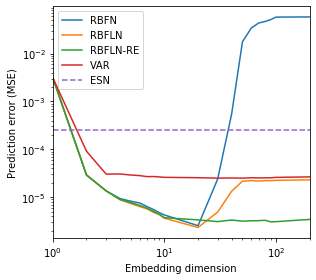

In [125]:
fig, ax = plt.subplots(figsize=(4.5,4))
model_names = ['RBFN', 'RBFLN', 'RBFLN RE 1', 'VAR', ]
# model_names = [ 'RBFLN rc', 'RBFLN ESN']
for name in model_names:

    average.loc[average['model_name'] == name].groupby('n_history').mean().sort_values(by='n_history').plot(ax = ax)

# pt[('amin', 'mse', 100, 1.0)].plot(ax=ax)
esn = average.loc[average['model_name'] == 'ESN'].groupby('n_history').mean().iloc[0]
plt.plot([1,200], [esn,esn], '--')
plt.legend(labels= ['RBFN', 'RBFLN', 'RBFLN-RE', 'VAR', 'ESN'], loc='upper left')

ax.set_yscale("log")
ax.set_xscale("log")
plt.xlabel('Embedding dimension')
plt.ylabel('Prediction error (MSE)')
plt.tight_layout()
# plt.title('Chua-like')
plt.savefig('../'+system_name+'_mse_window.pdf')
# plt.savefig('../_mse_window.pdf')
plt.show()